**These imports should run successfully (with a warning you can ignore). If they don't, it means you need to install them with the command listed on the lab handout! Close out of Jupyter first.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Binary Classifier Perceptron Model W/ ANSWERS

In this notebook, we'll write the essential functions to build and train a Perceptron that can classify images in the MNIST dataset. If you've never used Jupyter, these boxes are individual code snippets that can be run individually. Variables are stored in their scope across the entire document. Boxes like these are markdown, for documentation and instructional purposes!

### I. Perceptron Functions

To start, we'll write the functions that define a Binary Classifying Perceptron. Looking at Figure 1 in the handout, we can see that the overall behavior is split into two operations: the dot product in the neuron, and the activation function. Start by implementing a function that recreates the neuron. This function should compute the dot product between our input and weight vectors, then add the bias:

In [2]:
def neuron(x, weights, bias):
    """
    Computes the dot product between given weights and data vector (x), then adds bias.
    """
    z = np.dot(weights, x) + bias
    return z

Next, implement the activation function that will map the dot product to either a '1' or a '0' (as seen in Figure 2):

In [2]:
def activation_function(dot_product):
    """
    In this simple model, the activation function is a unit step which classifies
    negative inputs as 0 and positive inputs as 1.
    """
    if dot_product >= 0:
        return 1
    return 0

These two functions together define the entirety of the Perceptron's behavior. Putting them together in a 'predict' function gives us the ability (with the correct weights) to classify vectors of pixels as either '1's or '0's!

In [3]:
def predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through 
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    prediction = activation_function(prediction)
    
    return (prediction)

### II. Training Functions

Next, we will implement some functions that will train the weights of our model to make correct predictions. The key function is 'foward_propagation', which acts on a single input vector and returns the loss. We're using squared error loss (for a single input, just the squared difference between the prediction and the label) and its derivative.

Try writing the forward_propagation function here. You will need to run the model (weights and bias) on the input x, and compare it to the label y. You should output 1) the predicted value, 2) the squared error, and 3) the derivative of the squared error.

In [5]:
def forward_propagation(x, y, weights, bias): 
    """
    x: training data as a vector (nparray), where each value corresponds
        to a feature's value
    y: label (0 or 1)
    weights: weights of the perceptron
    bias: bias
    """
    y_pred = predict(x, weights, bias)
    loss = (y_pred - y)**2   
    d_loss = 2*(y_pred - y)
    
    return y_pred, loss, d_loss

In training, each of the weights is adjusted by the partial derivative of the loss with respect to that weight. In 'back_propagation', we must now take the partial derivative (with respect to each weight) of the dot product performed in the neuron. We are recreating the equation described in the last section:
$$
\frac{\partial C}{\partial w_i} = \frac{\partial C}{\partial y} * \frac{\partial y}{\partial z} * \frac{\partial z}{\partial w_i} 
$$
In forward_propagation, we have found the first term $\frac{\partial C}{\partial y}$. It turns out we can ignore the second term $\frac{\partial y}{\partial z}$ (the derivative of the prediction y with respect to the dot product z) because the step function is not differentiable. We need to find the last term $\frac{\partial z}{\partial w_i}$, then multiply it by the result from forward_propagation to get the full partial derivative.

Try writing back_propagation here. The function takes the input vector x and the derivative of the loss as found from forward_propagation. The derivative of the dot product with respect to each weight is deceptively simple. The function should return that derivative, multiplied by the d_loss.

In [6]:
def back_propagation(x, d_loss):
    """
    Performs the Backpropagation step on a given data point.
    Receives as input the data point, the Perceptron's weights and the partial derivative of the loss
    over the predicted y.
    The received derivative is used to calculate the partial derivative of the loss over the weight of each feature.
    A list with the partial derivatives of the loss over each weight is returned.
    """
    partial_derivates = list()
    for feature_value in x:
        partial_derivates.append(d_loss*feature_value)
        
    return partial_derivates  

A final training function brings it all together. In this function, 'x' is a 2D array of pixel vectors containing our entire dataset and 'y' is a vector containing the correct label for each image. To optimize the perceptron, we run through the dataset numerous times and adjust the weights by those partial derivatives until the error is sufficiently minimized.

In [7]:
def optimize_perceptron(x, y, learning_rate,  maxEpochs):
    """
    Optimizes the Perceptron's weights by looping over the same steps for the specified number of epochs.
    Steps:
    1. Forward propagate data point
    2. Backpropagate
    3. Update weights
    4. Check stop conditions while looping
    """
    epoch = 0
    error = 999
    weights = np.random.rand(x.shape[1])
    bias = 0 # we can just keep the bias at zero
    
    errors = list()
    epochs = list()
    
    # Loop until stop conditions are met
    while (epoch <= maxEpochs) and (error > 9e-4):
        
        loss_ = 0
        # Loop over every data point
        for i in range(x.shape[0]):
            
            # Forward Propagation on each data point
            y_pred, loss, d_loss = forward_propagation(x[i], y[i], weights, bias)

            # Backpropagation
            partial_derivates = back_propagation(x[i], d_loss)
            
            # Learn by updating the weights of the perceptron
            weights = weights - (learning_rate * np.array(partial_derivates))

        # Evaluate the results
        for index, feature_value_test in enumerate(x):
            y_pred, loss, d_loss = forward_propagation(feature_value_test, y[index], weights, bias)
            loss_ += loss

        errors.append(loss_/len(x))
        epochs.append(epoch)
        error = errors[-1]
        epoch += 1

        print('Epoch {}. loss: {}'.format(epoch, errors[-1]))

    
    return weights, bias, errors

### III. Data

We're finally ready to get our data! We'll be using just the 0s and 1s from the MNIST dataset, a selection of handwritten digits used frequently as a benchmark for neural networks. This section is pre-written for you, but take a second to see how the data is formatted and split in training and test sets. 

Data Matrix: (8816, 785)
Data Labels: [0 1]
Training Set Matrix: (6612, 784)
Test Set Matrix: (2204, 784)
Training Label Matrix: (6612,)
Test Set Matrix: (2204,)


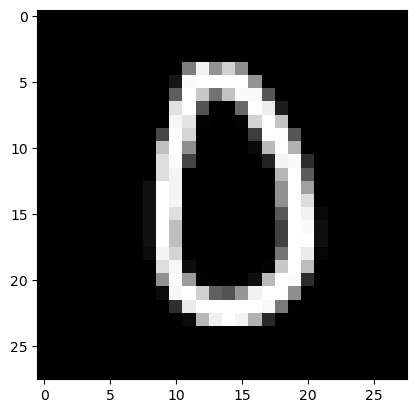

In [8]:
data = pd.read_csv('data_mnist.zip')

# Take only data with labels 1
data_ones = data[data['label'] == 1]

# Take only data with labels 0
data_zeros = data[data['label'] == 0]

# If you want to change either digit, just change the label value to either a 0 or a 1 so the activation function is still valid
# Ex. data_sevens = data[data['label'] == 7]
#     data_sevens['label'] = 0

# Concatenate instances with label 0 and 1
data = pd.concat([data_ones, data_zeros])
print("Data Matrix: {}".format(data.shape))
print("Data Labels: {}".format(np.unique(data['label'].to_numpy())))

# Split dataset with 75% training data and 25% test data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=1, shuffle=True)

# Split datasets into features and labels
x_train = train_data.drop('label', axis=1).to_numpy()
x_test = test_data.drop('label', axis=1).to_numpy()
y_train = train_data['label'].to_numpy()
y_test = test_data['label'].to_numpy()

# Let's see our data! The second dimension is the number of pixels, 28x28 = 784
print("Training Set Matrix: {}".format(x_train.shape))
print("Test Set Matrix: {}".format(x_test.shape))
print("Training Label Matrix: {}".format(y_train.shape))
print("Test Set Matrix: {}".format(y_test.shape))

# Rescale data points to values between 0 and 1 (pixels are originally 0-255)
x_train = x_train / 255.
x_test = x_test / 255.

# An example image from the training set:
plt.imshow(x_train[1].reshape([28, 28]), cmap='Greys_r')

### IV. Training the Model

We have our data, and we have our training functions. Let's run optimize_perceptron with these parameters and see how the model behaves. You should see the loss decreasing after each epoch.

In [10]:
weights, bias, errors = optimize_perceptron(x_train, y_train, learning_rate = 0.001, maxEpochs = 20)

Epoch 1. loss: 0.015426497277676952
Epoch 2. loss: 0.009679370840895343
Epoch 3. loss: 0.007108287961282517
Epoch 4. loss: 0.005747126436781609
Epoch 5. loss: 0.004537205081669692
Epoch 6. loss: 0.004083484573502722
Epoch 7. loss: 0.0034785238959467633
Epoch 8. loss: 0.0034785238959467633
Epoch 9. loss: 0.003327283726557774
Epoch 10. loss: 0.0028735632183908046
Epoch 11. loss: 0.0028735632183908046
Epoch 12. loss: 0.0024198427102238356
Epoch 13. loss: 0.0024198427102238356
Epoch 14. loss: 0.002117362371445856
Epoch 15. loss: 0.002117362371445856
Epoch 16. loss: 0.0019661222020568663
Epoch 17. loss: 0.0019661222020568663
Epoch 18. loss: 0.0018148820326678765
Epoch 19. loss: 0.001663641863278887
Epoch 20. loss: 0.0015124016938898972
Epoch 21. loss: 0.001663641863278887


When we turn these values into fixed-point bytes, we want them to be between 1 and -1.

In [13]:
for i in range(len(weights)):
    if weights[i] > 0:
        weights[i] = weights[i] / max(weights)
    if weights[i] < 0:
        weights[i] = -( weights[i] / min(weights) )

### V. Evaluating the Model

We'll use this function to determine the accuracy of our model. It just loops through the entire test set and finds the ratio of correct predictions to total data.

In [4]:
def calculate_accuracy(x_test, y_test, weights, bias):
    
    correct = 0
    
    for sample, label in zip(x_test, y_test):
        prediction = predict(sample, weights, bias)

        if prediction == label:
            correct += 1

    accuracy = correct / len(x_test)
    return accuracy


acc = calculate_accuracy(x_test, y_test, weights, bias)
print('Accuracy: ', acc)

NameError: name 'x_test' is not defined

### VI. Extracting Weights and Images

Visualizing the weights of the Perceptron show how it has learned - you may see an abstract shape of a 0 or 1!

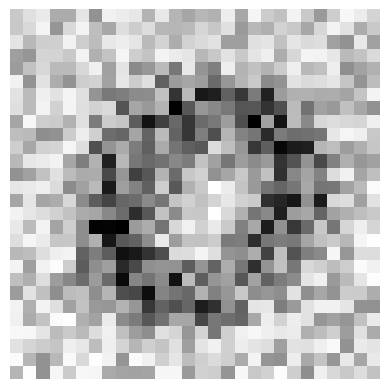

In [15]:
plt.imshow(weights.reshape([28,28]), cmap='Greys_r')
plt.axis('off')
plt.show()

The final goal of this notebook is to port the weights into our VHDL module as ROM. To do this, we'll need to convert all the weights into signed 8-bit values. Then, we'll create a .vhd file with a case statement containing all these weights.

In [16]:
def twos_comp(num, bits):
    """Converts an integer to its two's complement binary representation as a string.
        num: The integer to convert.
        bits: The number of bits to use for the representation.
    """
    if num < 0:
        num = (1 << bits) + num  # Adjust negative numbers to their two's complement equivalent
    return f'{num:0{bits}b}'

weight_values = []
for w in weights:
    weight_val = int(w * 127)
    weight_values.append(twos_comp(weight_val, 8))

In [27]:
file = open("weight_rom.vhd", 'w')

fileWidth = 28
xCoordinate = -1
yCoordinate = 0

file.write('library IEEE;\nuse IEEE.std_logic_1164.all;\nuse IEEE.numeric_std.all;\n')
file.write('entity weight_rom is\n')
file.write('    port(\n')
file.write('        clk : in std_logic;\n')
file.write('        totaladr: in unsigned(9 downto 0);\n')
file.write('        weight : out signed(7 downto 0)\n')
file.write('        );\n')
file.write('end weight_rom;\n')
file.write('\n')
file.write('architecture synth of weight_rom is\n')
file.write('begin\n')
file.write('    process (clk) begin\n')
file.write('        if rising_edge(clk) then\n')
file.write('            case totaladr is\n')


for i in range(len(weight_values)):
    xCoordinate += 1
    if xCoordinate == fileWidth:
        yCoordinate += 1
        xCoordinate = 0

    addr = str(f'{yCoordinate:05b}') + str(f'{xCoordinate:05b}')

    color = str(f'{weight_values[i]}')
    file.write('                when "' + addr + '" => weight <= "' + color + '";\n')
file.write('                when others => weight <= "00000000";\n')

file.write('        end case;\n')
file.write('    end if;\n')
file.write('    end process;\n')
file.write('end;\n')

file.close()

This image is a 0
784


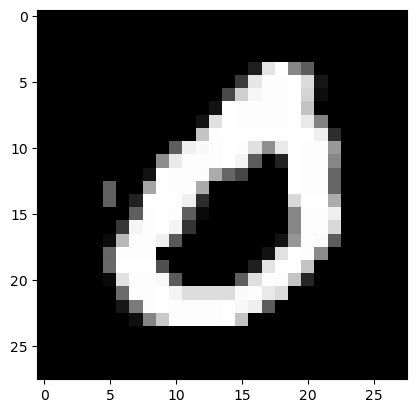

In [34]:
i = 6
image = x_train[i]

plt.imshow(image.reshape([28, 28]), cmap='Greys_r')
print(f'This image is a {y_train[i]}')

filename = f'im{i}_{y_train[i]}.vhd'

file = open(filename, 'w')

fileWidth = 28
xCoordinate = -1
yCoordinate = 0

file.write('library IEEE;\nuse IEEE.std_logic_1164.all;\nuse IEEE.numeric_std.all;\n')
file.write(f'entity im{i}_{y_train[i]} is\n')
file.write('    port(\n')
file.write('        clk : in std_logic;\n')
file.write('        totaladr: in unsigned(9 downto 0);\n')
file.write('        grayScale : out signed(7 downto 0)\n')
file.write('        );\n')
file.write(f'end im{i}_{y_train[i]};\n')
file.write('\n')
file.write(f'architecture synth of im{i}_{y_train[i]} is\n')
file.write('begin\n')
file.write('    process (clk) begin\n')
file.write('        if rising_edge(clk) then\n')
file.write('            case totaladr is\n')

print(len(image))

pixel_values = []
for p in range(len(image)):
    xCoordinate += 1
    if xCoordinate == fileWidth:
        yCoordinate += 1
        xCoordinate = 0

    addr = str(f'{yCoordinate:05b}') + str(f'{xCoordinate:05b}')


    pixel_val = int(image[p] * 127)
    pixel_values.append(twos_comp(pixel_val, 8))

    color = str(f'{pixel_values[p]}')
    
    file.write('                when "' + addr + '" => grayScale <= "' + color + '";\n')
file.write('                when others => grayScale <= "00000000";\n')

file.write('        end case;\n')
file.write('    end if;\n')
file.write('    end process;\n')
file.write('end;\n')

file.close()

### VI. FAKE SECTION: debugging

Here, we print the decimal and binary output from every operation in the perceptron. For bugfixing! Python can't multiply in binary on its own, so lots of conversion between binary and integers.

In [35]:
def debug_predict(x, weights, bias):
    """
    Predicts the class of a given data point (x) by running the input through 
    the neuron (dot product) and then applying the activation function.
    """
    prediction = np.dot(weights, x) + bias
    print(prediction)
    prediction = activation_function(prediction)
    
    return (prediction)

debug_predict(x_train[i], weights, bias)

-28.97809117996374


0

If you want to see the result of the dot product in binary and decimal for every single pixel, now you can:

In [36]:
def decimal(bin, dec):
    """Converts a two's complement binary str representation into a decimal w/ a specified point.
        bin: The binary to convert.
        dec: The bit location of the decimal point
    """
    decimal_value = 0
    for i, digit in enumerate(bin):
        if digit == '1':
            if(i == 0):
                decimal_value -= 1
            else:
                decimal_value += 2 ** (dec - i - 1)
    return decimal_value

def sign_extend(bin, length):
    """Sign extends a binary number to a certain length.
        bin: The binary to extend.
        length: The length of new binary.
    """
    extended_bin = ''
    bin_len = len(bin)
    for i in range(bin_len):
        if i == 0:
            for d in range(length - bin_len):
                extended_bin += bin[i]
        extended_bin += bin[i]
    return extended_bin

sum = 0
sum_dec = 0
for i in range(len(weight_values)):
    pixel = int(sign_extend(pixel_values[i], 16), 2) # convert to int (sign extend for signed multiplication!)
    w = int(sign_extend(weight_values[i], 16), 2)
    prod = (pixel * w) # take product
    prod_bin = f"{prod:016b}"
    prod_bin = prod_bin[len(prod_bin) - 16:]
    sum += int(sign_extend(prod_bin, 20), 2) # sign extend AGAIN for the larger sum register (20 bits)


    sum_bin = f"{sum:020b}"
    sum_bin = sum_bin[len(sum_bin) - 20:]

    pixel_dec = decimal(pixel_values[i], 1)
    w_dec = decimal(weight_values[i], 1)
    prod_dec = pixel_dec * w_dec
    sum_dec += prod_dec
    
    print(f'PIXEL: {pixel_values[i]}, {pixel_dec:0f}, WEIGHT: {weight_values[i]}, {w_dec:0f}, PRODUCT: {prod_bin}, {prod_dec:0f}, SUM: {sum_bin}, {sum_dec}')

PIXEL: 00000000, 0.000000, WEIGHT: 00110010, 0.390625, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 01001100, 0.593750, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 01011010, 0.703125, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 00010111, 0.179688, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 00010111, 0.179688, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 01010010, 0.640625, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 00000011, 0.023438, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000, 0.000000, WEIGHT: 01100100, 0.781250, PRODUCT: 0000000000000000, 0.000000, SUM: 00000000000000000000, 0.0
PIXEL: 00000000,